<a href="https://colab.research.google.com/github/barrosm/content/blob/master/Aula1_RN_mobile_20200125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INICIALIZAÇÃO

In [0]:
# Ir no Runtime antes para pedir GPU (Runtime > Change Runtime Type)
#Informações sobre a placa NVDIA da VM (se houver)
#!nvidia-smi  #comando da placa nvdia pra saber o que está rodando

In [8]:
#para conectar ao Drive
from google.colab import drive # Carrega biblioteca para montar e carregar drive
drive.mount('/content/drive') # Esse código pedirá autenticação


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import os
workdir_path = '/content/drive/My Drive/BIMaster_2019/' 
os.chdir(workdir_path)

In [10]:
!ls
#https://colab.research.google.com/drive/1MPBU7kXUIbZcyR8jMJgobImvmQ5TGWAA

 aula_20191109_leonardo
 aula_20191123_leonardo
 aula_20191207_leonardo
 aula_logica_fuzzy
 BIMaster_2019_Business_Intelligence.rar
 BIMaster_2019_DM.rar
 BIMaster_2019_Machine_Learning.rar
 BIMaster_2019_SAD.rar
 BreastCancer.csv
'Copy of similaridade de textot.ipynb'
'Copy of songdata.csv'
 draw_neural_net.py
 mobile.csv
 trabalho_leonardo


### Importacao de bibliotecas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set(rc={'figure.figsize':(17,6)})

pd.options.display.max_columns = None

In [12]:
#Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('mobile.csv', header=0)  #header=-1 indica que não há linha de header
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
#dimnesões da base
df1.shape

(2000, 21)

### Indicar a semente inicial e para divisão da base em treino e teste

In [0]:
import random
np.random.seed(0) #semente inicial
nlinhas = df1.shape[0]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,df1.columns != 'price_range'], df1['price_range'], test_size=0.3)

In [16]:
# alguns dados estatisticos por atributo
x_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1234.733571,0.494286,1.550214,0.514286,4.202143,0.523571,31.820000,0.504429,139.458571,4.516429,9.806429,659.709286,1264.751429,2102.074286,12.314286,5.838571,10.980714,0.764286,0.493571,0.509286
std,442.140136,0.500146,0.815758,0.499974,4.306668,0.499623,18.373277,0.288538,35.323154,2.273574,6.058362,444.851864,430.891660,1073.457393,4.163365,4.411914,5.491333,0.424596,0.500137,0.500092
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,840.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,108.000000,3.000000,4.750000,295.750000,886.750000,1203.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1224.000000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,140.000000,4.000000,10.000000,589.500000,1263.000000,2105.000000,12.000000,5.000000,11.000000,1.000000,0.000000,1.000000
75%,1610.250000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,169.250000,7.000000,15.000000,964.000000,1641.000000,2978.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


## Análise exploratória

### Dispersão

#### Visualização RAM x INT_MEMORY (Internal Memory in Gigabytes) e cores comos as classes de saída (PRICE_RANGE)

In [0]:
# Cor = faixa de preço do celular (y_train)
plt.scatter(x_train['ram'], x_train['int_memory'], c=y_train, cmap=plt.cm.Spectral);
plt.colorbar();
plt.xlabel('ram');
plt.ylabel('memory');
plt.title('Memory vs Ram');

#### Visualização PRICE_RANGE x BATTERY_POWER e cores comos as classes de saída (PRICE_RANGE)

In [0]:
df1.boxplot(column=['battery_power'], by=['price_range']);

In [0]:
df1.boxplot(column = ['ram'], by= ['price_range']);

In [0]:
#análise de correlação
import seaborn as sns
corr = df1.corr()
sns.heatmap(corr,cmap='YlGnBu',vmin=-1,vmax=1, yticklabels=True); #yticklabels = True garante que TODOS os labels serão exibidos

In [0]:
df1.boxplot(column = ['n_cores'], by= ['price_range']);

## **Normalizando os Dados**

## Preste atenção na normalização para não sair besteira. Por exemplo, se vc normaliza entre [-1, + 1] e isso serve de input para uma ReLu, sempre que o resultado da normalização for < 0 vai ser mapeado em zero. Potencialmente você vai ter um monte de dados mapeados em zero!

In [0]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized = preprocessParams.transform(x_test)

In [19]:
type(X_train_normalized)

numpy.ndarray

In [0]:
# Transformar em dataframe mantendo os nomes das colunas
#X_train_normalized = pd.DataFrame(X_train_normalized, columns = x_train.columns.values) 
#X_test_normalized = pd.DataFrame(X_test_normalized, columns = x_test.columns.values)

# Rede Neural

### Este código utiliza o Tensorflow 1.x, e o padrão do Colab mudará para o 2.0 em breve, que já tem o keras built-in

In [21]:
from keras import Model, Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [22]:
NumberOfClasses = len(y_train.unique())
NumberOfClasses

4

### A seguir você cria a RN, sequencialmente, usando Sequential. Sequential é uma classe, e você então chama os métodos dentro desta classe. A função Dense cria uma camada fully connected, i.e., é uma camada densa. Outra função que está sendo importada aqui é a SGD, Stochastic Gradient Descent, o método usado aqui para minimzar o erro da RN

In [23]:
 X_train_normalized.shape[1:]

(20,)

In [24]:
RN = Sequential()
# A seguir, camada densamente conectada com 10 neurônios
# Existem algumas heurísticas para a escolha do número de neurônios na camada escondida
# Também eu preciso dizer quantas entradas, aqui estou dizendo que é o número de colunas de X_train_normalized
# Não vai funcionar se a gente passar simplesmente X_train_normalized.shape[1] que é igual a 20
RN.add(Dense(10,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid')) #ReLu, ....
# O número de classes está sendo usado para 'settar' o número de classes na saída
# A seguir a camada de saída
RN.add(Dense(NumberOfClasses,activation = 'sigmoid'))
# summary imprime a estrutura da rede
RN.summary()
# camada escondida = (10 neuronios)*(20 inputs) + 10 biases = 210
# camada de saída = (4 neurônios) *(10 inputs = 10 saídas da camada anterior) + 4 biases = 44




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [25]:
# treinamento
from keras.utils import to_categorical
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['accuracy'])
trainedRN = RN.fit(X_train_normalized,to_categorical(y_train),
                            epochs = 100, verbose = 1)





Epoch 1/100





1400/1400 [==============================] - 0s 348us/step - loss: 0.2152 - acc: 0.2421
Epoch 2/100
1400/1400 [==============================] - 0s 34us/step - loss: 0.1886 - acc: 0.2821
Epoch 3/100
1400/1400 [==============================] - 0s 37us/step - loss: 0.1828 - acc: 0.3571
Epoch 4/100
1400/1400 [==============================] - 0s 36us/step - loss: 0.1757 - acc: 0.4707
Epoch 5/100
1400/1400 [==============================] - 0s 44us/step - loss: 0.1657 - acc: 0.5264
Epoch 6/100
1400/1400 [==============================] - 0s 32us/step - loss: 0.1530 - acc: 0.5786
Epoch 7/100
1400/1400 [==============================] - 0s 34us/step - loss: 0.1415 - acc: 0.5621
Epoch 8/100
1400/1400 [==============================] - 0s 33us/step - loss: 0.1331 - acc: 0.6221
Epoch 9/100
1400/1400 [==============================] - 0s 34us/step - loss: 0.1274 - acc: 0.6514
Epoch 10/100
1400/1400 [==============================] - 0s 30us/step - loss: 0.1232 - acc: 0.6550

In [26]:
score = trainedRN.model.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.02277722127735615
Test accuracy: 0.9666666658719381


In [27]:
!ls

 aula_20191109_leonardo
 aula_20191123_leonardo
 aula_20191207_leonardo
 aula_logica_fuzzy
 BIMaster_2019_Business_Intelligence.rar
 BIMaster_2019_DM.rar
 BIMaster_2019_Machine_Learning.rar
 BIMaster_2019_SAD.rar
 BreastCancer.csv
'Copy of similaridade de textot.ipynb'
'Copy of songdata.csv'
 draw_neural_net.py
 mobile.csv
 trabalho_leonardo


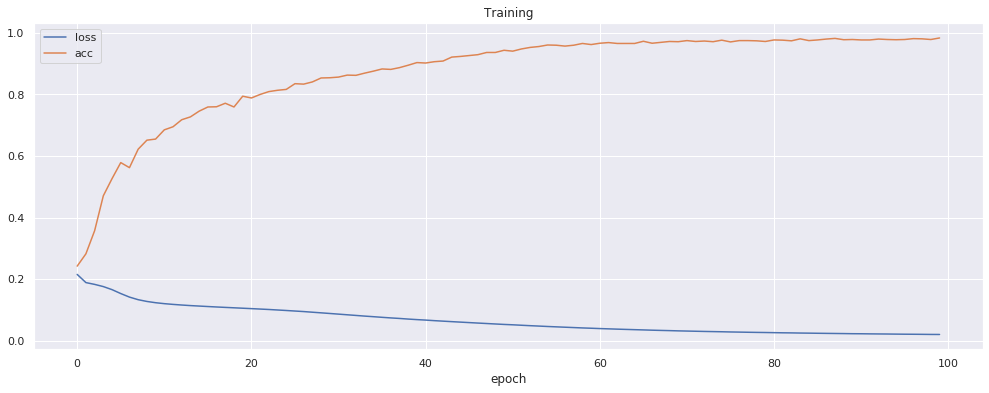

In [28]:
# USAR O ARQUIVO .py QUE FOI ENVIADO JUNTO HOJE
from draw_neural_net import PlotHistory
PlotHistory(trainedRN.history)

In [0]:
# Previsão
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values


In [30]:
# Matriz de confusão
confMatrix = pd.DataFrame(confusion_matrix(y_test_predicted_indexes, y_test_indexes), 
                                           index=['0', '1','2','3'], columns=['0', '1', '2', '3'],) #matriz de confusão
confMatrix.index.name = 'Actual'
confMatrix.columns.name = 'Predicted'
print(confMatrix)


Predicted    0    1    2    3
Actual                       
0          149    5    0    0
1            2  127    5    0
2            0    3  142    1
3            0    0    4  162
